# import the libraries
import pandas as pd
import scipy 
import numpy as np
from scipy import stats

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

# cutlets example

In [2]:
df=pd.read_csv("C:\\Users\\kalpana\\Downloads\\Cutlets.csv")

In [3]:
df

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


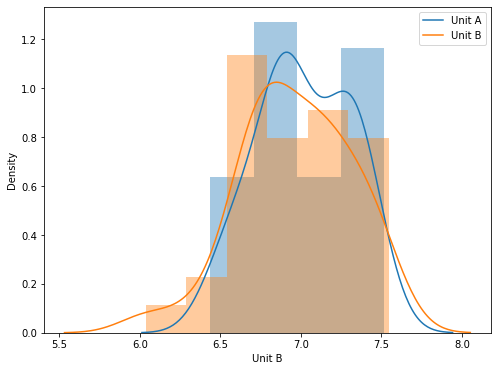

In [5]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(df['Unit A'], kde = True)
sns.distplot(df['Unit B'],hist = True)
plt.legend(labels)

# Compare Evidences with Hypothesis using t-statistics

In [6]:
statistic , p_value = stats.ttest_ind(df['Unit A'],df['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


# Question 2

# step1

In [7]:
df1=pd.read_csv("C:\\Users\\kalpana\\Downloads\\LabTAT (1).csv")

In [8]:
df1.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [9]:
df1.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


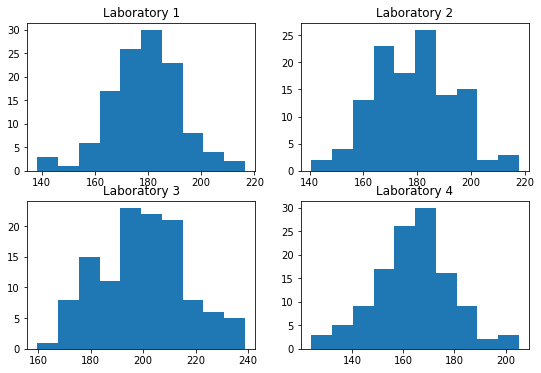

In [11]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(df1['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(df1['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(df1['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(df1['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()


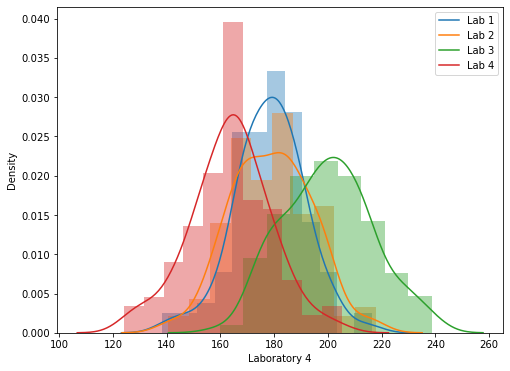

In [12]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(df1['Laboratory 1'], kde = True)
sns.distplot(df1['Laboratory 2'],hist = True)
sns.distplot(df1['Laboratory 3'],hist = True)
sns.distplot(df1['Laboratory 4'],hist = True)
plt.legend(labels)

# Compare Evidences with Hypothesis using t-statictic

In [13]:
test_statistic , p_value = stats.f_oneway(df1.iloc[:,0],df1.iloc[:,1],df1.iloc[:,2],df1.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [14]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


# Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples

# Question 3

In [15]:
df3=pd.read_csv("C:\\Users\\kalpana\\Downloads\\BuyerRatio (2).csv", index_col = 0)
df3

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [16]:
df3.head()

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [17]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

# Applying Chi-Square  contingency table to convert observed value into expected value

In [18]:
stat, p, dof, exp = stats.chi2_contingency(df3) 
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [19]:
stats.chi2_contingency(table) 

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [20]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [21]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)


Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


# interpreting p-value

In [22]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')
#Significnace=0.050, p=0.810
#We fail to reject Null hypothesis

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


# We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples.

# Question 4

We are going to conduct a Test of Independence using Chi-Square χ2 test with Contingency table

# Importing Files

In [23]:
df4=pd.read_csv("C:\\Users\\kalpana\\Downloads\\Costomer+OrderForm (2).csv")

In [24]:
df4.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [25]:
df4.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [26]:
df4.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [28]:
print(df4['Phillippines'].value_counts(),'\n',df4['Indonesia'].value_counts(),'\n',df4['Malta'].value_counts(),'\n',df4['India'])

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 0      Error Free
1       Defective
2      Error Free
3      Error Free
4      Error Free
          ...    
295    Error Free
296    Error Free
297    Error Free
298    Error Free
299    Error Free
Name: India, Length: 300, dtype: object


In [29]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


# Calculating Expected Values for Observed data

In [30]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


# Defining Expected values and observed values

In [31]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [ ]:
Compare p_value with ' '(Significane Level)
If p_value is not equal α we failed to reject Null Hypothesis because of lack of evidence
If p_value is = α  we reject Null Hypothesis

In [32]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


# We fail to reject Null Hypothesis because of lack of evidence.